# Hyper Parameters

- Ví dụ

    $Y = ?$ biết $x = x^*$

    $$
    Y = \{c_1, c_2, c_3, \ldots\}
    $$

    $$
    P(y = c_j \mid x^*) = P_j
    $$

    $\Rightarrow y^*$ tương ứng với x là giá trị có xác suất lớn nhất.

    $$
    y^* = \argmax_{c_j} (y = c_j \mid x^*)
    $$

Learning = Representation + Evaluation + Optimization

- VD:

    $$
    D = \{x_1, x_2, x_3, \ldots\}
    $$

    Giả sử X tuân theo phân phối chuẩn Gauss

    $$
    X \sim N(\sigma, \mu)
    $$

    pdf = probalibity density function.

    $$
    pdf(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
    $$

    1. Xác suất quan sát được nằm trong khoảng [x, x + dx]
        $$
        P(x) = pdf(x)dx
        $$
    2. Xác suất quan sát được nằm trong khoảng [a, b]
        $$
        P(x) = \int_{a}^{b} pdf(x)dx
        $$
    3. Xác suất quan sát được nằm trong khoảng $(-\infty , +\infty)$
        $$
        P(x) = \int_{-\infty}^{+\infty} pdf(x)dx = 1
        $$

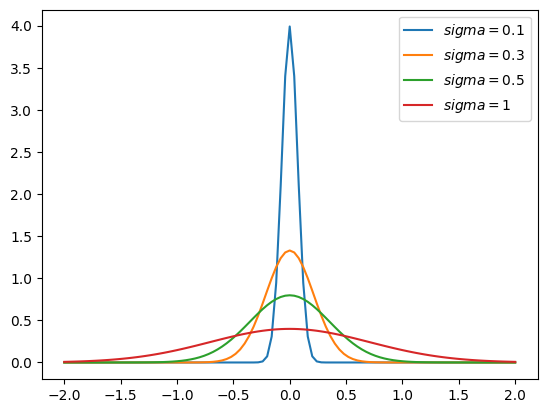

In [3]:
import numpy as np
import matplotlib.pyplot as plt


sigma = 0.2
x = np.linspace(-2, 2, 101)

for sigma in[0.1, 0.3, 0.5, 1]:
    g = lambda x: np.exp(-x**2/sigma**2)/np.sqrt(2*np.pi*sigma**2)
    y = g(x)
    plt.plot(x, y, label=f"$sigma = {sigma}$")
    
plt.legend()
plt.show()


A và B là 2 sự kiện (biến cố) độc lập:

$$
P(A, B) = P(A).P(B) 
$$

$$
P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)
$$

Like lihood: Khả năng quan sát độc lập dữ liệu
$$
P(\Delta) = P(x_1, x_2, x_3, \ldots)
$$

Giả thiết: iid = independent identical distribution
1. independent: Việc thu được $x = x_1$ độc lập với sự kiện $x = x_2$
    $$
    P(D) = P(x_1).P(x_2).P(x_3)\ldots\ P(x_n) (I)
    $$

2. dentical distribution: Tất cả $x_i$ đều được rút ra (drawing) từ cùng 1 phân phối
    $$
    P(x) \sim \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} (II)
    $$

    $$
    (II) \& (I) \rightarrow P(D \mid \theta) = \prod_{i = 1}^{m} \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
    $$

    $\theta = (\mu, \sigma)$

Maximun likelihood: Tìm giá trị tham sô ($\theta$) sao cho giá trị của likilihood đạt cực đại

$$
\hat{\theta} = (\hat{\mu}, \hat{\sigma}) = \argmax_{\theta} P(D \mid \theta)
             = \argmax_{\theta} \underset{L}{(log P(D \mid \theta))}
$$

(III) $\rightarrow$

$$
L = \sum_{i = 1}^{m} log (\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}})
$$

$$
L = \sum_{i = 1}^{m} (-\frac{1}{2}log2\pi\sigma^2 - \frac{x_i - \mu}{2\sigma^2})
$$

(IV) $\rightarrow$
$$
\begin{cases}
    \frac{\mathrm{d}f}{\mathrm{d}x} = 0 \\
    \frac{\mathrm{d}^2f}{\mathrm{d}x^2} = 0
\end{cases}
$$

$$
\frac{\mathrm{d}f}{\mathrm{d}x} = -\sum_{i = 1}^{m} \frac{x_i - \sigma}{\mu^2} = 0
$$

$$
\iff \sum{x_i} - m\mu = 0 \iff \hat{\mu} = \frac{1}{m} \sum_{i = 1}^{m} (x_i)
$$

$$
\iff \hat{\sigma} = \frac{1}{m} \sum_{i = 1}^{m} (x_i - \mu)^2
$$

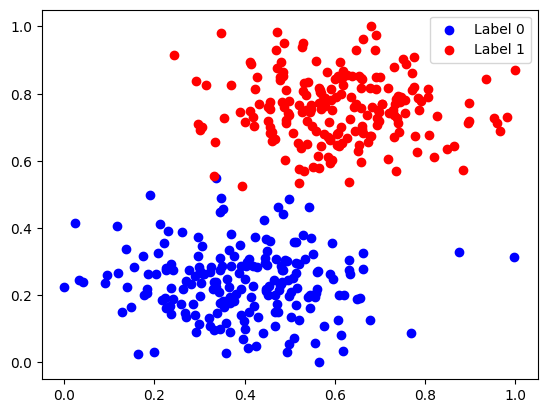

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(400, 2, centers=2, random_state=2, cluster_std=1.5)

X_min = X.min(axis=0, keepdims=True)
X_max = X.max(axis=0, keepdims=True)

X = (X - X_min) / (X_max - X_min)

plt.scatter(X[y==0, 0], X[y==0, 1], c='b', label="Label 0")
plt.scatter(X[y==1, 0], X[y==1, 1], c='r', label="Label 1")
plt.legend()

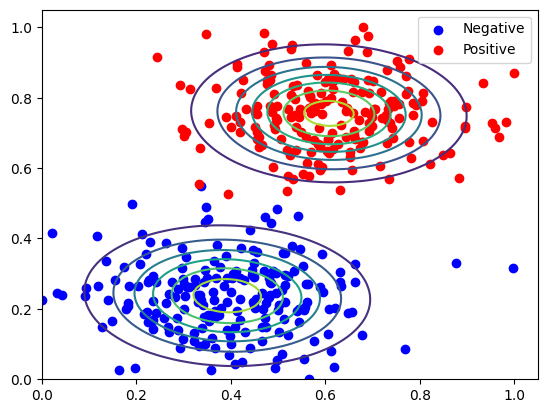

In [10]:
from scipy.stats import multivariate_normal

X1 = X[y==0, :]
sigma1 = np.cov(X1.T)
mu1 = X1.mean(axis = 0)
g1 = multivariate_normal(mu1, sigma1)

X2 = X[y==1, :]
sigma2 = np.cov(X2.T)
mu2 = X2.mean(axis = 0)
g2 = multivariate_normal(mu2, sigma2)

a, b = np.mgrid[0:1:0.01, 0:1:0.01]
pos = np.dstack((a,b))

plt.contour(a, b, g1.pdf(pos))
plt.scatter(X1[:, 0], X1[:, 1], c='b', label="Negative")

plt.contour(a, b, g2.pdf(pos))
plt.scatter(X2[:, 0], X2[:, 1], c='r', label="Positive")

plt.legend()